15.077/IDS.147 Problem Set 8 <br>
**Name:** Chun-Hei Lam. **ID:** 928931321 <br>
**Declaration:** I pledge that the work submitted for this coursework is my own unassisted work unless stated otherwise. <br>
**Acknowledgement to:** Harry Yu

In [1]:
import numpy as np
import pandas as pd

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [51]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import sklearn.tree
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

import graphviz

# Competitive Auctions in eBay.com

The file `eBayAuctions.xls` contains information on 1972 auctions transacted on eBay.com. The goal is to use these data to build a model that will classify competitive auctions from noncompetitive ones. A competitive auction is defined as an auction with at least two bids placed on the item auctioned. The data include variables that 
- describe the item (auction category), 
- the seller (his/her eBay rating), and 
- the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). 
In addition, we have the price at which the auction closed. The goal is to predict whether or not the auction will be competitive.

In [87]:
auction = pd.read_csv("eBayAuctions.csv")
auction

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


**Data Preprocessing**. (1) Create dummy variables for the categorical predictors. These include `Category` (18 categories), `Currency` (USD, GBP, Euro), `EndDay` (Monday-Sunday), and `Duration` (1, 3, 5, 7, or 10 days). 

In [88]:
dummy_auction = pd.get_dummies(auction, columns=["Category", "currency", "Duration", "endDay"])
for i, k in enumerate(dummy_auction.columns):
    print(i, k)

0 sellerRating
1 ClosePrice
2 OpenPrice
3 Competitive?
4 Category_Antique/Art/Craft
5 Category_Automotive
6 Category_Books
7 Category_Business/Industrial
8 Category_Clothing/Accessories
9 Category_Coins/Stamps
10 Category_Collectibles
11 Category_Computer
12 Category_Electronics
13 Category_EverythingElse
14 Category_Health/Beauty
15 Category_Home/Garden
16 Category_Jewelry
17 Category_Music/Movie/Game
18 Category_Photography
19 Category_Pottery/Glass
20 Category_SportingGoods
21 Category_Toys/Hobbies
22 currency_EUR
23 currency_GBP
24 currency_US
25 Duration_1
26 Duration_3
27 Duration_5
28 Duration_7
29 Duration_10
30 endDay_Fri
31 endDay_Mon
32 endDay_Sat
33 endDay_Sun
34 endDay_Thu
35 endDay_Tue
36 endDay_Wed


In [89]:
# dummy_auction2 = pd.get_dummies(auction, columns=["Category", "currency", "endDay"])
# for i, k in enumerate(dummy_auction2.columns):
#    print(i, k)

(2) Split the data into training and validation datasets using a 60% : 40% ratio.

In [90]:
X = dummy_auction.drop(columns = ["Competitive?"])
y = dummy_auction["Competitive?"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.4, random_state = 1234)

In [91]:
y_train.sum()

641

**Part (a), from PSet 6:** Fit a classification tree using all predictors, using the best pruned tree. To avoid overfitting, set the minimum number of observations in a leaf node to 50. Also, set the maximum number of levels to be displayed at seven.  To remain within the limitation of your software, combine some of the categories of categorical predictors.  Write down the results in terms of rules.

In [92]:
clf1 = sklearn.tree.DecisionTreeClassifier(min_samples_leaf = 50, max_depth=7).fit(X_train, y_train)
clf1.score(X_train, y_train), clf1.score(X_test, y_test)

(0.8689771766694844, 0.8314321926489227)

1

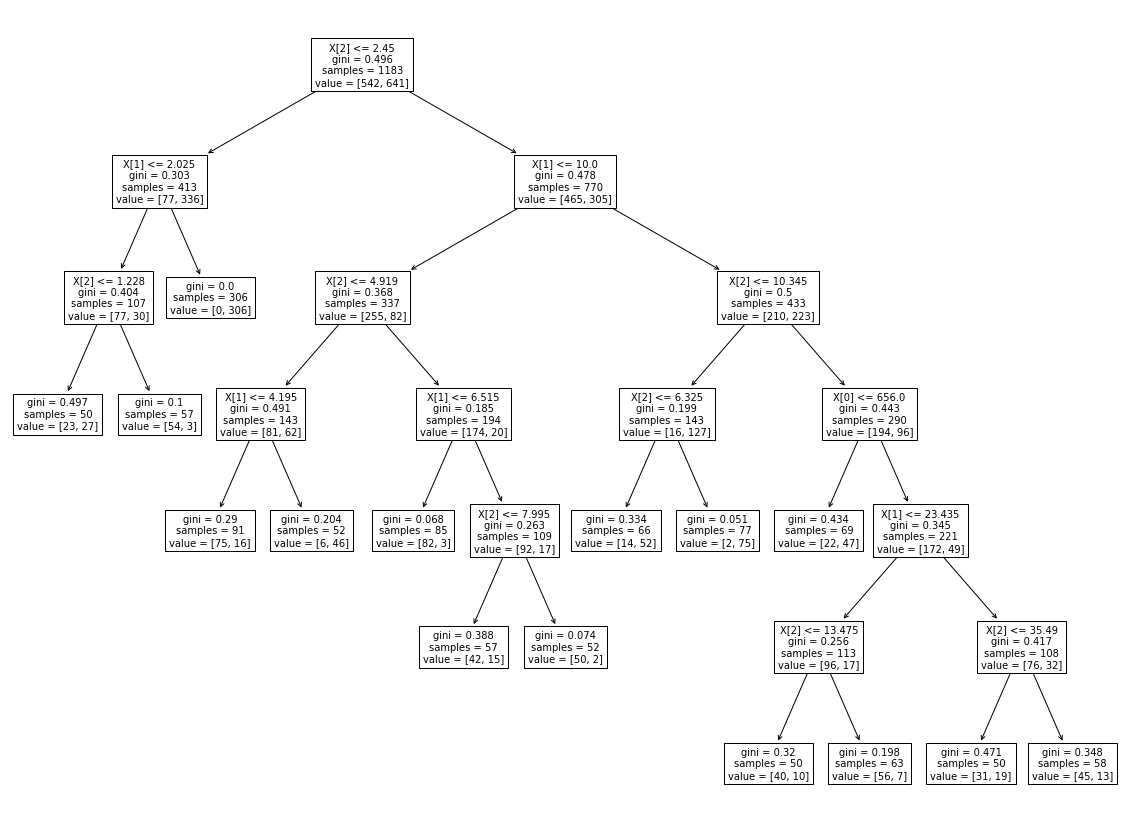

In [93]:
fig, ax = plt.subplots(figsize = (20,15))
sklearn.tree.plot_tree(clf1, ax=ax)
1

*I think the low values of off-diagonal entries in the confusion matrix suggests the classification is satisfactory.*

**Part (h):** Run a boosted tree with the same predictors as in part (a).  For the validation set, what is the overall accuracy?

In [95]:
clf2 = AdaBoostClassifier().fit(X_train, y_train)
clf2.score(X_train, y_train), clf2.score(X_test, y_test)

(0.893491124260355, 0.8504435994930292)

**Part (i):** Run a bagged tree with the same predictors as in part (a).  For the validation set, what is the overall accuracy?

In [96]:
clf3 = BaggingClassifier().fit(X_train, y_train)
clf3.score(X_train, y_train), clf3.score(X_test, y_test)

(0.9856297548605241, 0.8783269961977186)

**Part (j):** Run a random forest with the same predictors as in part (a).  For the validation set, what is the overall accuracy?

In [97]:
clf4 = RandomForestClassifier().fit(X_train, y_train)
clf4.score(X_train, y_train), clf4.score(X_test, y_test)

(0.9957734573119188, 0.8694550063371356)

**Part (k):** Compare the accuracy of the trees in f, h, i, and j.

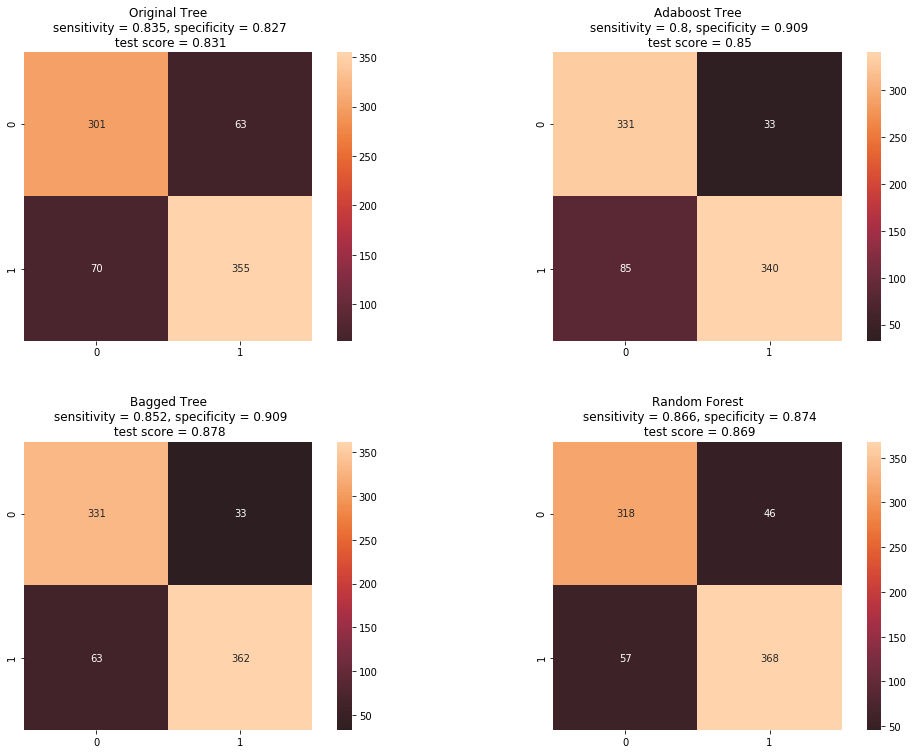

In [121]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
clf = [clf1, clf2, clf3, clf4]
title = ["Original Tree", "Adaboost Tree", "Bagged Tree", "Random Forest"]
idx = [(0,0), (0,1), (1,0), (1,1)]
fig.tight_layout(h_pad=8.0, w_pad=0.0)

for i in range(4):
    conf_mat = sklearn.metrics.confusion_matrix(y_test, clf[i].predict(X_test))
    test_score = np.round(clf[i].score(X_test, y_test),3)
    sensitivity = np.round(conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1]), 3)
    specificity = np.round(conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1]), 3)
    sns.heatmap(conf_mat, center=0, annot=True, square=True, ax = ax[idx[i]], fmt='g')
    ax[idx[i]].set_title(title[i] 
                         + f"\n sensitivity = {sensitivity}, specificity = {specificity}"
                         + f"\n test score = {test_score}")

Observations:
- We definitely see improvement when boosting/bagging/random forest are used.
- In terms of test score, bagged tree is the best.
- In term soof sensitivity, random forest is the best.
- Inconclusive for specificity.
- Notice the comparison here is not fair in terms of number of parameters setting. Here we used, according to recitation, the default parameters in `scikit-learn` for all of the algorithms.

# Running Random Forest on Spam Data (Hastie 15.6)

Fit a series of random-forest classifiers to the spam data, to explore the sensitivity to the parameter $m$. Plot both the OOB as well as the test error against a suitably chosen range of values for $m$.

In [49]:
spam = pd.read_csv("spam.txt", sep = ' ', header = None)

*Solution:* We run random forest for differen numbers of $m$. For the same $m$ we run for 5 trials. We report the average OOB and test error over the 5 trials.

In [52]:
X = spam.iloc[:, :-1]
y = spam.iloc[:, [-1]]
# scaler = StandardScaler()
# X = scaler.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1111)

In [72]:
n = 20
trials = 5
oob_error = np.zeros(n)
train_score = np.zeros(n)
test_score = np.zeros(n)

for max_features in tqdm(list(range(1,n+1)) * trials):
    clf_rf = RandomForestClassifier(max_features = max_features, oob_score = True
                                       ).fit(X_train, y_train.values.ravel())
    
    oob_error[max_features - 1] += clf_rf.oob_score_
    train_score[max_features - 1] += clf_rf.score(X_train, y_train.values.ravel())
    test_score[max_features - 1] += clf_rf.score(X_test, y_test.values.ravel())

oob_error = oob_error / trials
train_score = oob_error / trials
test_score = oob_error / trials

Text(0.5, 1.0, 'test score')

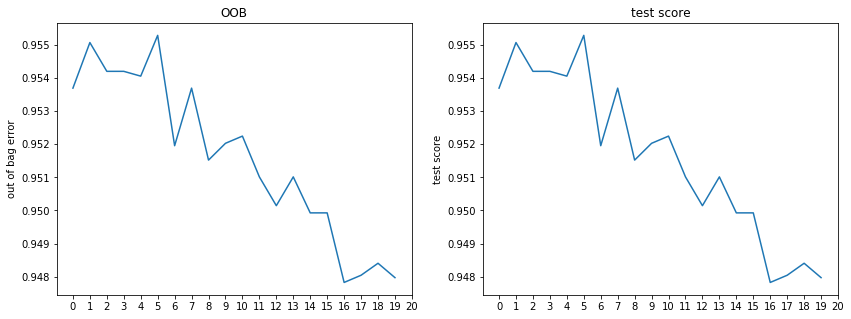

In [123]:
fig, ax = plt.subplots(ncols = 2, figsize=(14,5))
ax[0].plot(oob_error)
ax[0].set_xticks(range(21))
ax[0].set_ylabel("out of bag error")
ax[0].set_title("OOB")

ax[1].plot(oob_error)
ax[1].set_ylabel("test score")
ax[1].set_xticks(range(21))
ax[1].set_title("test score")

From the figure, it seems that the optimal $m$ (down-sample size of input variables) is 